# Looking out for our Senior Citizens

By Glady Barrios Jul,15,2022

## Project Goals

 The Goal of this project is to identify the diffrent drivers of churn. 
 Mostly focusing on our senior citizens and trying to see the diffrent attributes that are causing our seniors to chrun  
  

## Project Description 

There are sevral reasons as to why our customers are churning here in this project I will explore the diffrent variables that can cause churn esspecilly variables I was not able to look at in previouse project. We will analize the diffrent variables and have our main focus on one demographic, our senior citizens. we will analize the data of our seniors to see different areas of churn by using data exploration, statistical tests and ML classification models and end it off buy reviewing my conclusions, findings, and recomendations.

#### Mini - Data dictionary 

- senior_citizen      | non-null  | int64 | 1- indiction that the customer is a senior citizen 

- monthly_charges     | non-null  | float64| 

- tech_support        | non-null  | object | indicatted by a Yes or No

- payment_type        | non-null  | object | Mailed check, Electronic check, credit card (automatic), Bank transfer (automatic)
 
- churn               | non-null  | object | indicated by a Yes or No

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ignore warnings 
import warnings
warnings.filterwarnings("ignore")

#this will be for my data wrangling 
import acquire
import prepare
from prepare import split

#This will be needed for some statistical test I do in Exploration 
from scipy import stats

#all of this if our Modeling 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(123)

# Wrangle Telco Data

In [40]:
df = acquire.get_telco_data()
df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


## In summary 
- Using my SQL credentials I was able to grab the data from the codeup SQL database using the get_connection function
- I used an sql function to grab the data and group it to a data frame
- Then I created another function to then turn it to a csv file

In [3]:
df = prepare.prep_telco_data(df)
pd.set_option('display.max_columns', None)
#this is just to display all the columns 
df.head()
# head will show me the first 5 rows 

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [4]:
train, validate, test = prepare.split(df, stratify_by= 'churn')

train.shape, validate.shape, test.shape



((3937, 51), (1688, 51), (1407, 51))

## In summary 

- There where some blank space for total charges, therefore those rows where dropped 
- Converted total charges as float 
- Converted all categorical variables to numeric 
- Created dummy variables for several columns 
- Lastly I will be using my split fuction to calculate my train, validate, test 

# Lets look at the Data

Text(0.5, 1.0, 'churned Customers')

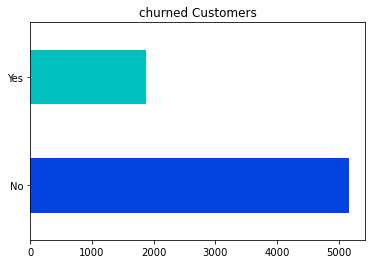

In [5]:
#the rate of churn for our customers 
df.churn.value_counts().plot(kind= 'barh', color = ["xkcd:blue", "c"])
plt.title("churned Customers")

In [6]:
#looking at the numbers
df.churn.value_counts()

No     5163
Yes    1869
Name: churn, dtype: int64

<AxesSubplot:xlabel='senior_citizen', ylabel='count'>

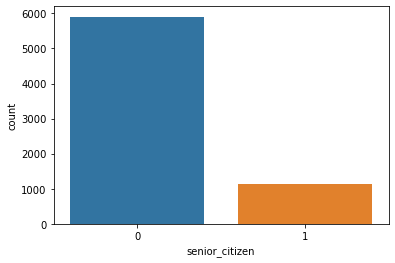

In [69]:
#the amount of seniors and non seniors
sns.countplot(x='senior_citizen', data=df)

In [70]:
#looking at the numbers
df.senior_citizen.value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

<AxesSubplot:xlabel='payment_type', ylabel='count'>

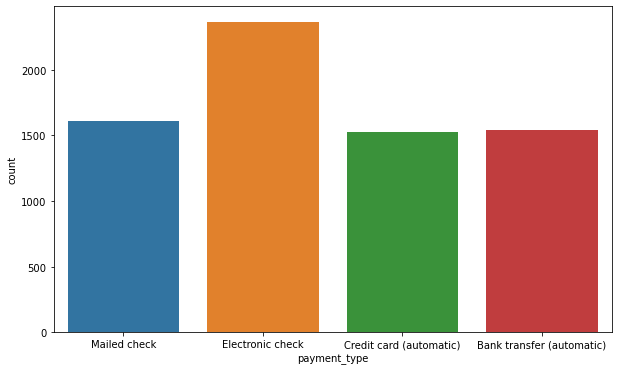

In [71]:
#looking at the diffrent amounts of customer who use certain payment time 
plt.figure(figsize=(10,6))
sns.countplot(x='payment_type', data=df)

In [72]:
# looking at specific number of our customers using our diffrent payment methods 
df.payment_type.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64

---------------------------------------------------------------------------------------------------------------

# Exploration: What is causing churn ?

## Question 1 - Are certain payment types indicators of churn ? 

Text(0.5, 1.0, 'Churn and Payment Type')

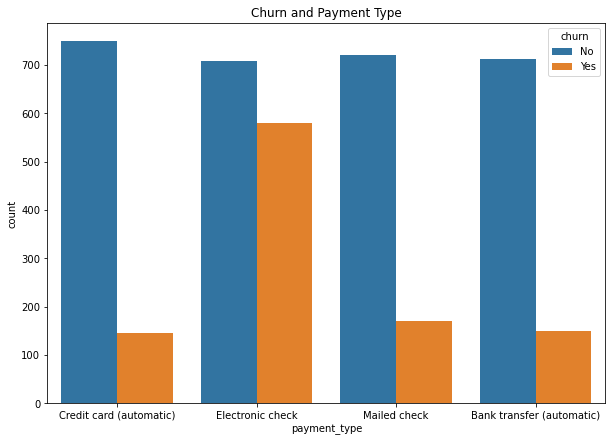

In [73]:
#churn vs payment_type 
plt.figure(figsize=(10,7))
sns.countplot(train['payment_type'],hue=train['churn'])
plt.title("Churn and Payment Type")

$H_0$ = "payment type and churn are independent"


$H_a$ = "there is a relationship between using an elecronic check and churn"


In [74]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
# Setup a crosstab of observed churn and payment_type 
#This is the best statistical test becasue we are looking at two categorical variables 
observed = pd.crosstab(train.churn, train.payment_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")
   


Reject the null hypothesis


### Quick recap of what we saw 
- Our electronic check system has a much higher churn rate than any other payment type 
- Using a statistical test can confirm what we saw, there is a realtionship between churn and using an electronic check 

##  What payment method are seniors using ?

<AxesSubplot:xlabel='payment_type', ylabel='count'>

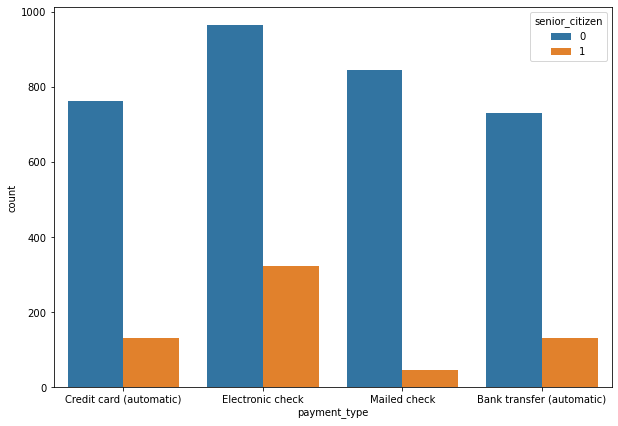

In [75]:
#showing what diffrent payemnt types 
plt.figure(figsize=(10,7))
#this count plot will show the number of customers
sns.countplot(train['payment_type'],hue=train['senior_citizen'])

### Major takeaways

- One of the biggest indicators of chrun are our electronic payment method 
- Looking at our seniors we can see that the vast majority of our seniors use the electronic checks

---------------------------------------------------------------------------------------------------

# Learning about our Seniors

##  Question 2 - Are our senior citizen more likely to churn than non seniors ? 

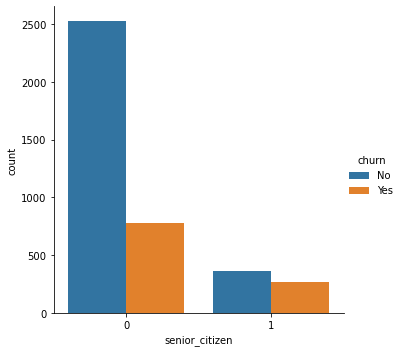

In [76]:
#chart for our seniors who churn
sns.catplot(x="senior_citizen",hue = 'churn', data=train, kind='count')

In [77]:
#lets look at the numbers 
pd.crosstab(train.senior_citizen, train.churn)

churn,No,Yes
senior_citizen,,
0,2527,775
1,364,271


In [78]:
#Show how many seniors are in the train data 
train.senior_citizen.value_counts()

0    3302
1     635
Name: senior_citizen, dtype: int64

## Major takeaways 

- About half of our senior customers are more likely to churn 
- We can use this information to touch on other potential questions 

## Question 3 - Do people who churn have higher monthly charges? 

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

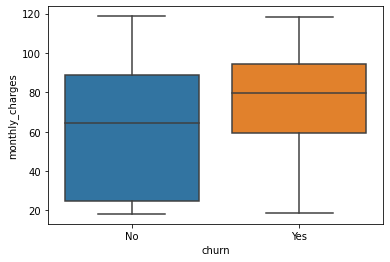

In [79]:
sns.boxplot(x="churn", y="monthly_charges", data=train)



In [80]:
churn_sample = train[train.churn == 'Yes'].monthly_charges
no_churn_sample = train[train.churn == 'No'].monthly_charges

null_hypothesis = "the monthly charges of customers who churn equal to the monthly charges of customer who do not churn"
alternative_hypothesis = "the monthly charges of customers who churn not equal to the monthly customer who do not churn"


In [81]:
alpha = 0.05
t, p = stats.ttest_ind(churn_sample,no_churn_sample, equal_var=False)
#For this I did a T-statistical test becasue we are working with a categorical variable and a quatative variable 

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")


We reject the null hypothesis


# Lets get specific  !

## What are our seniors paying in monthly charges ?

<AxesSubplot:xlabel='senior_citizen', ylabel='monthly_charges'>

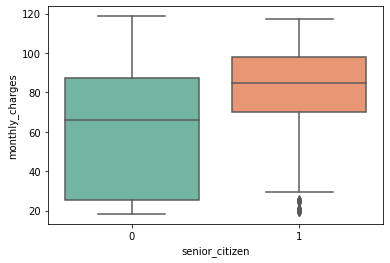

In [82]:
sns.boxplot(x='senior_citizen', y="monthly_charges", data=train, palette ='Set2')

In [83]:
senior_sample = train[train.senior_citizen == 1].monthly_charges
not_senior_sample = train[train.senior_citizen == 0].monthly_charges

null_hypothesis = "the monthly charges of seniors is equal too the monthly charges of non-seniors"
alternative_hypothesis = "the monthly charges of customers who are seniors is not equal too non-seniors"


In [84]:
alpha = 0.05
#For this I did a T-statistical test becasue we are working with a categorical variable and a quatative variable 

t, p = stats.ttest_ind(senior_sample,not_senior_sample, equal_var=False)

if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Lets recap so far
- Our customers who are senior citizens do have a higher average monthly charge than our non-seniors 
- Any customer no matter the age are more likely to churn due to high monthly charges 

# Question 4 -is someone uses tech support more likely to churn?

<AxesSubplot:xlabel='tech_support', ylabel='count'>

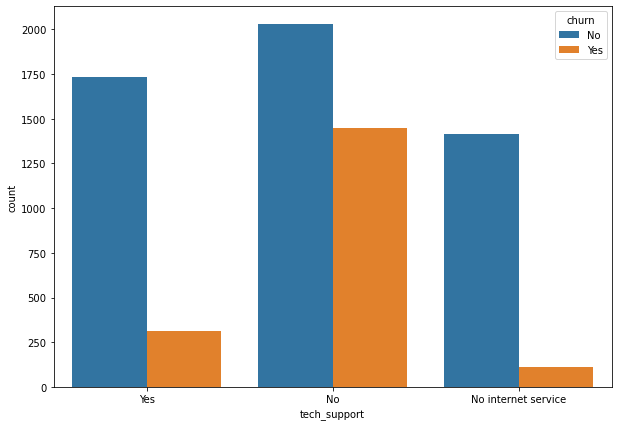

In [85]:
#number of customers who do not use the tech suppprt option 
plt.figure(figsize=(10,7))
sns.countplot(x='tech_support', data=df, hue="churn")

In [86]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "Not having tech support and churn are independent"
alternative_hypothesis = "there is a relationship between not having tech support and churn"

# Setup a crosstab of observed tech_support to churn
observed = pd.crosstab(train.tech_support, train.churn)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")





Reject the null hypothesis


### Are seniors mostly using tech support ?

<AxesSubplot:xlabel='tech_support', ylabel='count'>

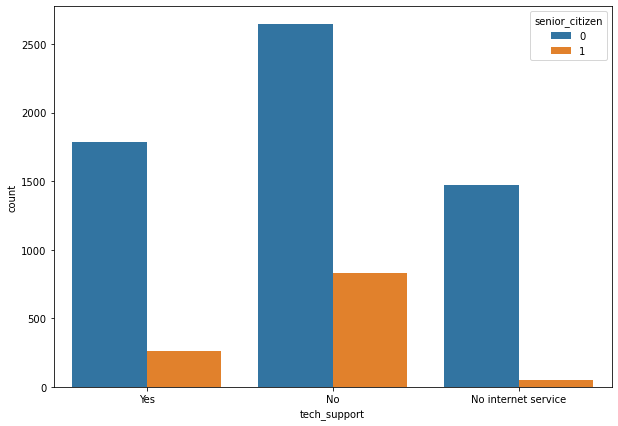

In [87]:
plt.figure(figsize=(10,7))
sns.countplot(x='tech_support', data=df, hue="senior_citizen")

## Major findings!

- We can see that many of our customer who churn, do not use our tech support services


- With our seniors we see that the vast majority of them do not use our tech services as well 

------------------------------------------------------------------------------------------------------

# TELCO MODELING - Lets focus on everyone!

### Baseline Model 

In [88]:
#This is our baseline model, we want all the customer to not churn!

baseline_accuracy = (train.churn == 'No').mean()
print(f"baseline_accuracy: {round(baseline_accuracy, 2)}")

baseline_accuracy: 0.73


In [89]:
#remember this from the begining it is best to split the data to make better predictions 
train.shape, validate.shape, test.shape


((3937, 51), (1688, 51), (1407, 51))

In [90]:


# create X & y version of train, where y is a series with just the target variable and X are all the features. 
# I dropeed all of these extra categorical collums 
# This will be used for our modeling 
X_train = train.drop(columns=['churn','churn_encoded','customer_id', 'gender','partner', 'dependents', 
                              'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 
                              'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'contract_type', 'internet_service_type', 
                              'payment_type'])
y_train = train[['churn']]

X_validate = validate.drop(columns=['churn','churn_encoded', 'customer_id', 'gender','partner', 'dependents', 'phone_service', 'multiple_lines', 
                                    'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 
                                    'paperless_billing', 'contract_type', 'internet_service_type', 'payment_type'])
y_validate = validate[['churn']]

X_test = test.drop(columns=['churn','churn_encoded', 'customer_id', 'gender','partner', 'dependents', 'phone_service',
                            'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support',
                            'streaming_tv', 'streaming_movies', 'paperless_billing', 'contract_type', 
                            'internet_service_type', 'payment_type'])
y_test = test[['churn']]


# The Models I used 
After Several trials and erros here are the diffrent models I used 

1) Decision Tree with a Max depth of 10,    

            Train:91%|Validate:77%|Diff:14%

2) KNN with  a n_neighbor of 7     

            Train:82%|Validate:77%|Diff: 5%
            
** for a visualization of these models please direct to my github page**

I did not choose these becasue I noticed a large diffrence in accuracy perentage I wanted something that had much less. The more I tried to have a better train prediction the more diffrent the validate was. I decided find one where the accuracy was very simmilar for both train and validate.
 
Random Forest was the winner!


3) Random Forest max_depth of 5 

           Train:80%|Validate:79% |Diff: 1%

# Random Forest

this classifier based on constructing a multitude of decision trees, 
choosing random subsets of variables for each tree, and using the most frequent tree output as the overall classification.

In [91]:
#Create the Random Forest object with desired hyper-parameters.
#in this case I chose max_depth of 5


rf = RandomForestClassifier(max_depth=5, 
                            random_state=123)

In [92]:
#Fit the random forest algorithm to the training data.
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=123)

In [93]:
#this is where we make the predictions
y_pred = rf.predict(X_train)


In [94]:
#this will estimate the probability 
y_pred_proba = rf.predict_proba(X_train)


In [95]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.80


In [96]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.93      0.87      2891
         Yes       0.70      0.46      0.55      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.69      0.71      3937
weighted avg       0.79      0.80      0.79      3937



### Now lets test on Validate 

In [97]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.79


### Now Test

In [98]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.80


-----------------------------------------------------------------------------

## In summary 
Random Forest when tested on:
- Train- 80%
    
- Validate- 79%
    
- Test- 80%

This is much better model than KNN and Decision Tree

- Great plusses to using this model it can reduce the amount of overfitting
- It can be much more accurate than decision tree 

--------------------------------------------------------------------------------------------------

# Conclusion 

- One of the biggest indicators of chrun are our electronic payment method learning from charts the majority of seniors use this type of payment method  

- Seniors pay more in mothly charges that our non- seniors 

- We can see that many of our customer who churn, do not use our tech support services, especially our seniors

- The best clasification model turned out to be Random Forest with the best accuracy 

## Recomendations

- Starting a senior discount innitative

Or 

- Making more bundle deals for our customers

- Promote our tech serives to everyone especially to our seniors

- Instead of having this Electronic check option we can go for trying automatic payments
    - Incentives to try to get customers to not use the electronic check method 


## Next Steps

What I would do

- Keep looking for other potential drivers of churn with our seniors

- Look for more drivers of churn with our non-senior population 

- perform further modeling to make better preictions to reduce churn 
